In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df  = sm.datasets.macrodata.load_pandas().data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [9]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


[Text(0, 0.5, 'Real GDP')]

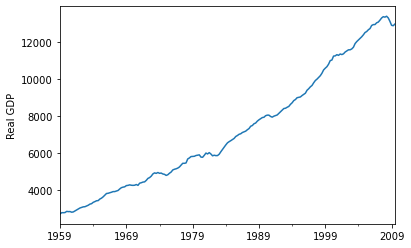

In [13]:
ax=df['realgdp'].plot()
ax.autoscale(axis='x', tight=True)
ax.set(ylabel="Real GDP")

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [16]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

<class 'pandas.core.series.Series'>


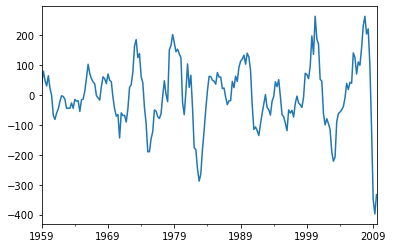

In [20]:
print(type(gdp_cycle))
gdp_cycle.plot()

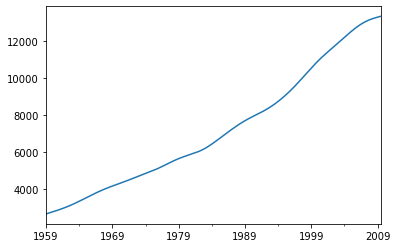

In [21]:
gdp_trend.plot()

In [23]:
df['trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


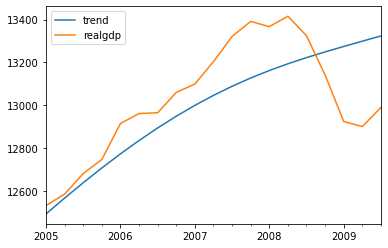

In [25]:
df[['trend', 'realgdp']]['2005-01-01':].plot()

# different Data now

In [22]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [23]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [25]:
airline.dropna(inplace=True)
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


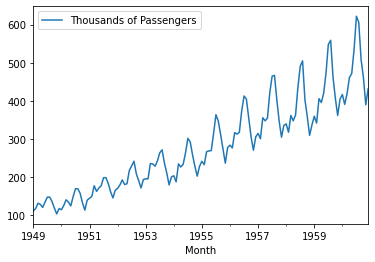

In [26]:
airline.plot()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

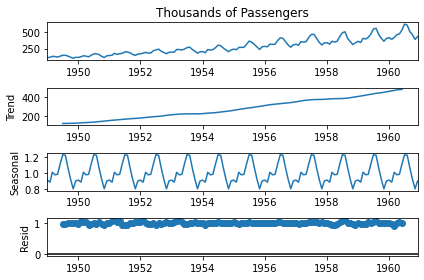

In [29]:
result.plot();

# Another data

In [14]:
df = pd.read_csv('co2.csv', delimiter=";", index_col='date', parse_dates=True)

In [15]:
df = df[df.index >= "1950-01-01"]
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1950m1', '2014m12'))
# df.index = pd.to_datetime(df.index, format="%Y-%m-%d")

In [16]:
df.head()

,data_mean_global,data_mean_nh,data_mean_sh
1950-01-31,313.597898,314.751334,312.444461
1950-02-28,313.968034,315.402500,312.533568
1950-03-31,314.274349,315.997671,312.551026
1950-04-30,314.468454,316.441488,312.495420
1950-05-31,314.310746,316.134174,312.487318


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 780 entries, 1950-01-31 to 2014-12-31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_mean_global  780 non-null    float64
 1   data_mean_nh      780 non-null    float64
 2   data_mean_sh      780 non-null    float64
dtypes: float64(3)
memory usage: 24.4 KB


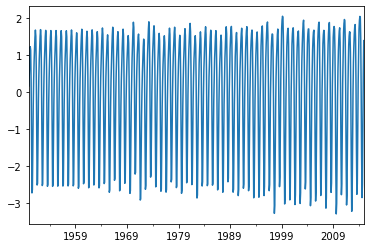

In [18]:
d2_cycle, d2_trend = hpfilter(df['data_mean_global'], lamb=1600)
d2_cycle.plot()

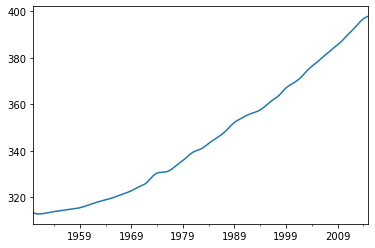

In [19]:
d2_trend.plot()

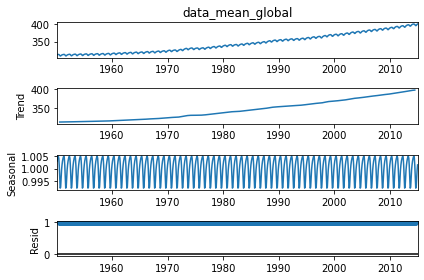

In [21]:
# df.dropna(inplace=True)
result = seasonal_decompose(df['data_mean_global'], model='multiplicative', period=12)
result.plot();

In [30]:
airline['6_month_SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [33]:
airline['12_month_SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [35]:
airline.head(12)

,Thousands of Passengers,6_month_SMA,12_month_SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


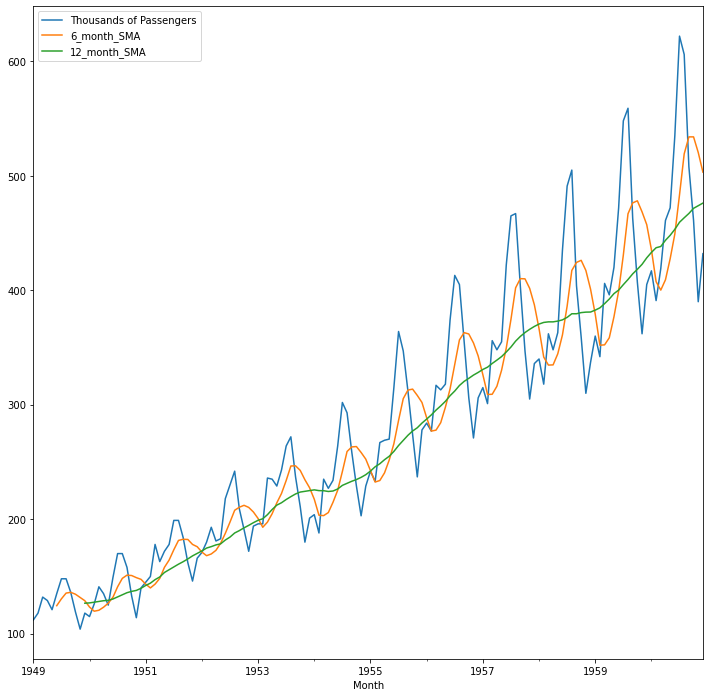

In [38]:
airline.plot(figsize=(12,12))

In [39]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12, adjust=False).mean()

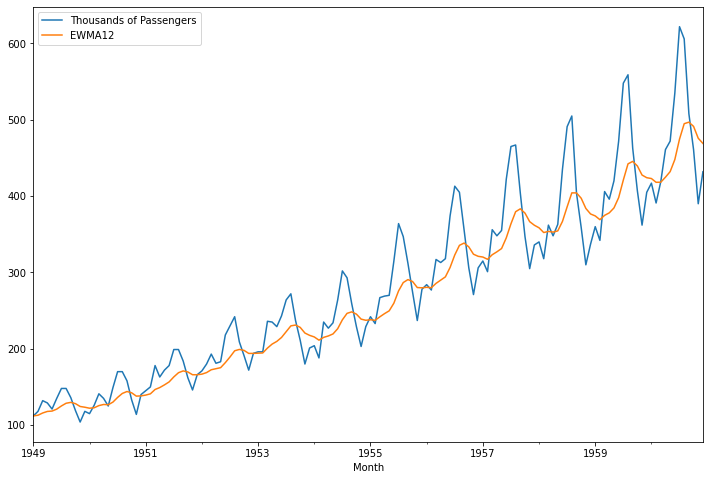

In [43]:
airline[['Thousands of Passengers', 'EWMA12']].plot(figsize=(12,8))

# Another part

In [44]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [45]:
airline.dropna(inplace=True)

In [46]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [47]:
airline.index.freq='MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [50]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [58]:
airline['DES_add12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend="add").fit().fittedvalues.shift(-1)

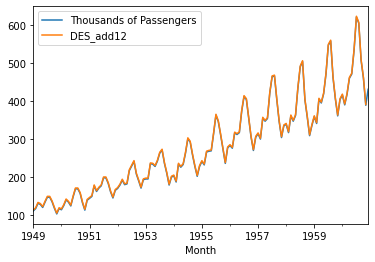

In [60]:
airline.plot()

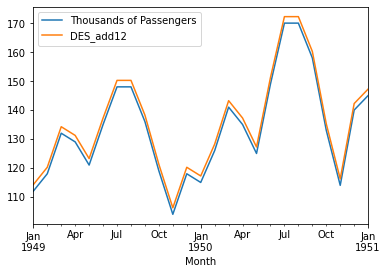

In [62]:
airline[:25].plot()

## Summarize

started with the example of detection of trend and ... based on the hedric prescode filter
Then we discussed problem of identifiying trend sesonal and residuals and the smoothing using naive moving average, exponential weighted movein average at the end we ended app discussing double exponential smoothing and a variatn with triple exponential smoothing. In this way we came up with the first algorithm which we can use for forecasting of time series.

 Co będzie sie działo tego nikt ni wiem chyba. można popatrzeć na tą książke z internetu załączoną na eportalu. Forecasting coś tam ... tylko, że ona jest w R nie w pythonie. 